<h2 style='color:blue' align='center'>bone marrow to 21 class Images Classification Using Convolutional Neural Network (CNN)</h2>

<img src="small_images.jpg" />

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
import os

SEED = 15243
np.random.seed(SEED)
os.environ["PYTHONHASHSEED"] = str(SEED)
tf.random.set_seed(SEED)

plt.rc("axes.spines", right=False, top=False)
plt.rc("font", family="serif")

In [2]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [3]:
!pip list

Package                       Version
----------------------------- ---------------
absl-py                       1.4.0
alabaster                     0.7.12
anaconda-client               1.11.2
anaconda-navigator            2.4.2
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
binary

In [2]:
pip install split-folders

Note: you may need to restart the kernel to use updated packages.


<h4 style="color:purple">Load the dataset</h4>

In [4]:
import splitfolders
import os
path = r"D:\downloadss\archive(8)\bone_marrow_cell_dataset"
print(os.listdir(path))

['ABE', 'ART', 'BAS', 'BLA', 'EBO', 'EOS', 'FGC', 'HAC', 'KSC', 'LYI', 'LYT', 'MMZ', 'MON', 'MYB', 'NGB', 'NGS', 'NIF', 'OTH', 'PEB', 'PLM', 'PMO']


In [4]:
# splitfolders.ratio(path,seed=1337, output="chest-Splitted", ratio=(0.9, 0.05, 0.05))

In [5]:
BATCH_SIZE = 25
DATA_DIRT = (r"C:\Users\Lenovo\Desktop\notboak projects\bone_marrow-Splitted\train")
DATA_DIRTE = (r"C:\Users\Lenovo\Desktop\notboak projects\bone_marrow-Splitted\test")
DATA_DIRV = (r"C:\Users\Lenovo\Desktop\notboak projects\bone_marrow-Splitted\val")
IMG_SIZE = 256
MAX_EPOCHS = 25
class_names = ['ABE', 'ART', 'BAS', 'BLA', 'EBO', 'EOS', 'FGC', 'HAC', 'KSC', 'LYI', 'LYT', 'MMZ', 'MON', 'MYB', 'NGB', 'NGS', 'NIF', 'OTH', 'PEB', 'PLM', 'PMO']
class_details = ['ABE', 'ART', 'BAS', 'BLA', 'EBO', 'EOS', 'FGC', 'HAC', 'KSC', 'LYI', 'LYT', 'MMZ', 'MON', 'MYB', 'NGB', 'NGS', 'NIF', 'OTH', 'PEB', 'PLM', 'PMO']

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    DATA_DIRT,
    batch_size=BATCH_SIZE,
    image_size=(IMG_SIZE, IMG_SIZE),
    class_names=class_names,
    seed=45,
)

validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
    DATA_DIRV,
    batch_size=BATCH_SIZE,
    image_size=(IMG_SIZE, IMG_SIZE),
    class_names=class_names,
    seed=45,
    
    
)

testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
    DATA_DIRTE,
    batch_size=BATCH_SIZE,
    image_size=(IMG_SIZE, IMG_SIZE),
    class_names=class_names,
    seed=45,

    
)


def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label


def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds=validation_ds.map(process)
testing_ds=testing_ds.map(process)


Found 71368 files belonging to 21 classes.
Found 8915 files belonging to 21 classes.
Found 8938 files belonging to 21 classes.


In [6]:
# Cache and prefetch data for faster training
AUTOTUNE = tf.data.AUTOTUNE



def compile_and_fit_model(model: tf.keras.Sequential) -> tf.keras.callbacks.History:
    model.compile(
        optimizer="adam",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor="val_loss",
        min_delta=1e-4,
        patience=5,
        mode="auto",
        restore_best_weights=True
    )
    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.2,
        patience=5,
        min_lr=0.001
    )
    history = model.fit(
        train_ds,
        validation_data=validation_ds,
        epochs=30,
        callbacks=[early_stopping, reduce_lr]
    )
    performance_df = pd.DataFrame(history.history)
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
    for ax, metric in zip(axes.flat, ["accuracy", "loss"]):
        performance_df.filter(like=metric).plot(ax=ax)
        ax.set_title(metric.title(), size=15, pad=20)
    return history

def plot_predictions(model: tf.keras.Sequential) -> None:
    plt.figure(figsize=(14, 14))
    for images, labels in train_ds.take(1):
        labels = labels.numpy()
        predicted_labels = np.argmax(model.predict(images), axis=1)
        for i, (actual, pred) in enumerate(zip(predicted_labels, labels)):
            ax = plt.subplot(5, 5, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            if actual == pred:
                plt.title(class_details[labels[i]], color="green", size=9)
            else:
                plt.title(f"{class_details[predicted_labels[i]]}\n"
                          + f"(Actual: {class_details[labels[i]]})",
                          color="red", size=9)
            plt.axis("off")

## InceptionV3

In [7]:
pretrained_inception_v3_base=tf.keras.applications.inception_v3.InceptionV3(
    include_top=False,
    weights='imagenet',
    pooling="avg"
)
pretrained_inception_v3_base.trainable = False


inception_v3_modell = tf.keras.Sequential([
    layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.Lambda(tf.keras.applications.inception_v3.preprocess_input),
    pretrained_inception_v3_base,
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(21, activation="softmax")
])
inception_v3_modell.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 256, 256, 3)       0         
                                                                 
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 21)                10773     
                                                                 
Total params: 23,125,301
Trainable params: 1,322,517
Non-trainable params: 21,802,784
_________________________________________________________________


Epoch 1/30
2855/2855 [==============================] - 3279s 1s/step - loss: 2.1480 - accuracy: 0.2922 - val_loss: 2.0426 - val_accuracy: 0.3319 - lr: 0.0010
Epoch 2/30
2855/2855 [==============================] - 4315s 2s/step - loss: 2.0275 - accuracy: 0.3319 - val_loss: 1.9760 - val_accuracy: 0.3642 - lr: 0.0010
Epoch 3/30
2855/2855 [==============================] - 4277s 1s/step - loss: 1.9681 - accuracy: 0.3541 - val_loss: 1.9632 - val_accuracy: 0.3611 - lr: 0.0010
Epoch 4/30
2855/2855 [==============================] - 4376s 2s/step - loss: 1.9193 - accuracy: 0.3707 - val_loss: 1.8921 - val_accuracy: 0.3906 - lr: 0.0010
Epoch 5/30
2855/2855 [==============================] - 4300s 2s/step - loss: 1.8886 - accuracy: 0.3814 - val_loss: 1.9416 - val_accuracy: 0.3644 - lr: 0.0010
Epoch 6/30
2855/2855 [==============================] - 8712s 3s/step - loss: 1.8647 - accuracy: 0.3899 - val_loss: 1.8982 - val_accuracy: 0.3827 - lr: 0.0010
Epoch 7/30
2855/2855 [========================

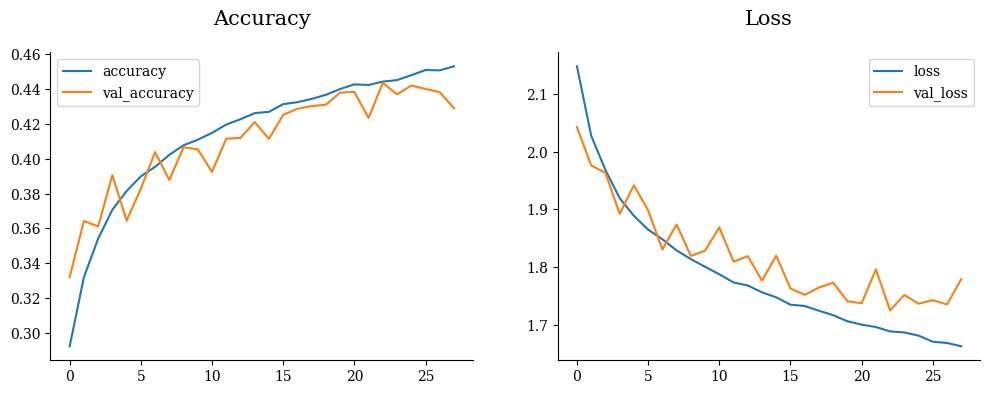

In [8]:
inception_v3_history = compile_and_fit_model(inception_v3_modell)

In [9]:
score =inception_v3_modell.evaluate(testing_ds, steps = len(testing_ds)/BATCH_SIZE, verbose = 0)
print('test loss:', score[0])
print('test accuracy:', score[1])

test loss: 1.7077409029006958
test accuracy: 0.445333331823349
